# Data Processing#

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
pd.pandas.set_option('display.max_columns',None)

In [135]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.shape

(13320, 9)

In [136]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [137]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [139]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [140]:
# sns.pairplot(df)

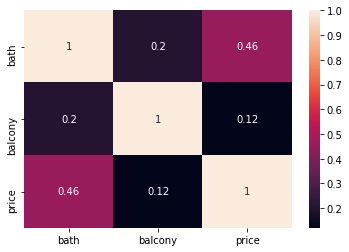

In [141]:
# Drawing a heatmap for corresponding values
sns.heatmap(df.corr(),annot=True)
# We can observe high correlation between bath and price

In [142]:
#Checking the unique values for every feature
for i in df.columns:
    print(df[i].value_counts())
    print("**********************************************")

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
**********************************************
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     

# Data cleaning

In [143]:
#checking how many empty cells exist 
features_with_na=[features for features in df.columns if df[features].isnull().any()]

for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,4))
    print("-------------------------------")
# About 50% empty cells in society therefore dropping it

('location', 0.0075)
-------------------------------
('size', 0.1201)
-------------------------------
('society', 41.3063)
-------------------------------
('bath', 0.548)
-------------------------------
('balcony', 4.5721)
-------------------------------


In [144]:
#seeing where the data is missing
# sns.heatmap(df.isnull())

In [145]:
df.drop("society",axis='columns',inplace=True,errors="ignore")

In [146]:
df.shape

(13320, 8)

In [147]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [148]:
#now we need to fill balcony empty values
df['balcony']=df['balcony'].fillna(df["balcony"].mean())

In [149]:
df.isnull().sum()
#now we can drop the rest of the empty rows

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [150]:
df.dropna(inplace=True)

In [151]:
df.isnull().sum()
#data is now clean 

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

# Feature Engineering    

#          Total Sqft

In [152]:
df["total_sqft"].unique()
#Total sqft has different types of values, like ranges and floats and strings
#We need to normalize all of them to 1 type only 
#we can do that by splitting the data

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [153]:
new_sqft=[]
for i in df["total_sqft"]:
    try:
        new_sqft.append(float(i)) #if the value is a number, it will get appended, and if not, it will throw an error
    except:
        if "-" in i: #for values like 123-522 we are taking their average
            temp=[]
            temp=i.split('-')
            new_sqft.append((float(temp[0])+float(temp[-1]))/2)
        else:
            new_sqft.append(np.nan)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [154]:
#faced an issue in the indexing of the dataframe, therefore resetting the index of the dataframe
df.reset_index(drop=True,inplace=True) #here we're not adding the index column in the df
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [155]:
df=df.drop(["total_sqft"],axis=1)
#removing the old square feet
df=df.join(pd.DataFrame({'total_sqft':new_sqft}))
#adding the new total square feet


In [156]:
#checking for null values present in the new column that we added. 
df.isnull().sum()
#we can drop these values

area_type        0
availability     0
location         0
size             0
bath             0
balcony          0
price            0
total_sqft      46
dtype: int64

In [157]:
df.dropna(inplace=True)
df.shape

(13200, 8)

# Size of the house

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 8 columns):
area_type       13200 non-null object
availability    13200 non-null object
location        13200 non-null object
size            13200 non-null object
bath            13200 non-null float64
balcony         13200 non-null float64
price           13200 non-null float64
total_sqft      13200 non-null float64
dtypes: float64(4), object(4)
memory usage: 928.1+ KB


In [159]:
df["size"].head() # we can observe we only need the first number and not the rest of the string therefore split based on space and then take the first


0        2 BHK
1    4 Bedroom
2        3 BHK
3        3 BHK
4        2 BHK
Name: size, dtype: object

In [160]:
new_size=[]
for i in df["size"]:
    try:
        new_size.append(int(i.split(" ")[0]))#taking the first part and converting it into an integer 
    except:
        new_size.append(np.nan)#appending a nan value if its not working 
        

In [161]:
df=df.drop(["size"],axis=1,errors="ignore")
#removing the old size
df=df.join(pd.DataFrame({"size":new_size}))
#appending the new size 

In [162]:
df.head()

,area_type,availability,location,bath,balcony,price,total_sqft,size
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,1056.0,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,1440.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,1521.0,3.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,1200.0,2.0


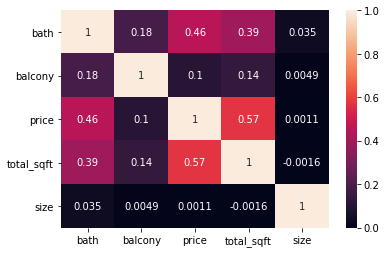

In [163]:
sns.heatmap(df.corr(),annot=True)

# Working with outliers 

outliers cause various wierd results since they are at one extreme, and dont usually match the rest of the data, and therefore must be removed

In [164]:
#we will be catching the outliers using the boxplot and the histograms as and when needed
import scipy.stats as stats

#creating a function for plotting
def outlier_check(df,var):
    plt.figure(figsize=(15,4))
    #giving a set size for plt

    #histogram
    plt.subplot(1,2,1)
    sns.distplot(df[i],bins=25)
    plt.title("Histogram")

    #BoxPlot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[i])
    plt.title("BoxPlot")

    plt.show()

**********bath**********


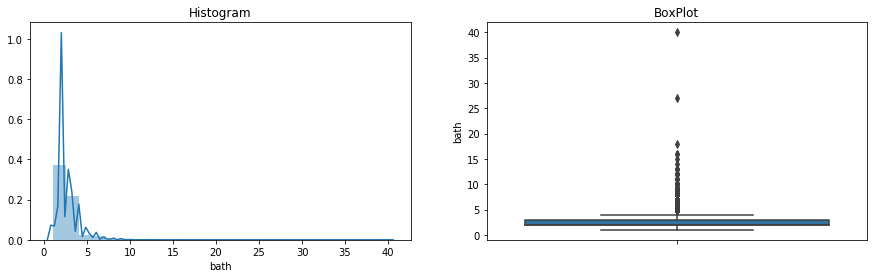

**********balcony**********


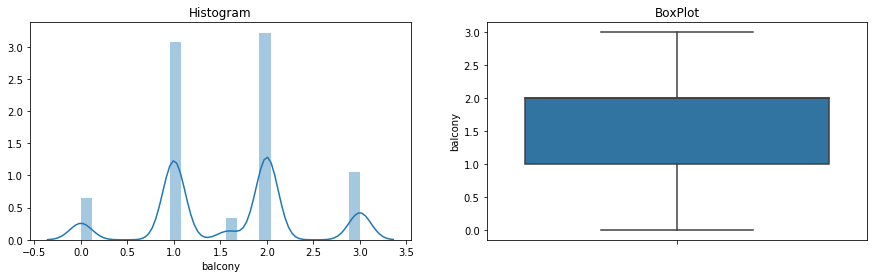

**********total_sqft**********


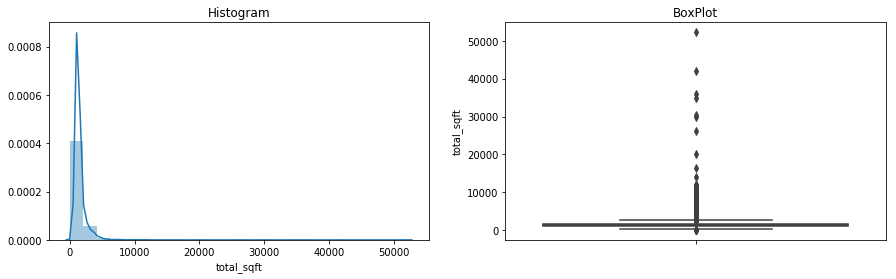

**********size**********


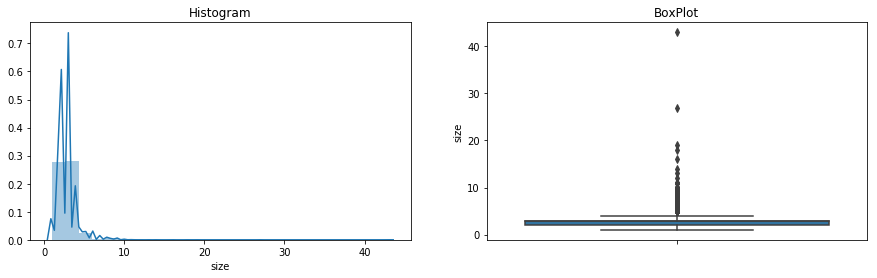

**********price**********


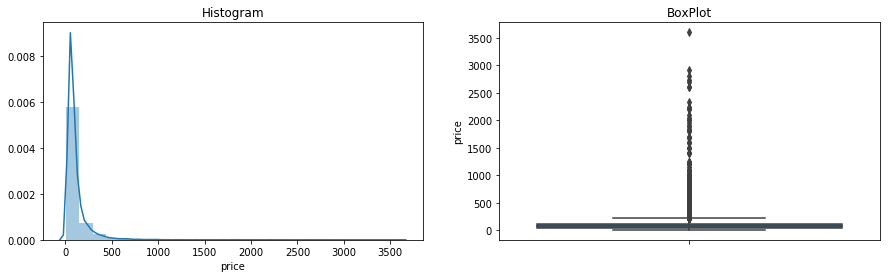

In [165]:
plot=["bath","balcony","total_sqft","size","price"]
for i in plot:
    print("**********"+i+"**********")
    outlier_check(df,i)

    #We can observe how each graph shows different levels of outliers using the two graphs that we have
    #bath, total_sqft, size   have a lot of outliers 

In [166]:
#assuming that the minimum size for a 1 bhk is 400 sqft 
df[df["total_sqft"]/df["size"]<350].head()

#we can see a lot of outliers 

,area_type,availability,location,bath,balcony,price,total_sqft,size
9,Plot Area,Ready To Move,Gandhi Bazar,6.0,1.584376,370.0,1020.0,6.0
26,Super built-up Area,Ready To Move,Electronic City,1.0,1.000000,23.1,660.0,2.0
29,Super built-up Area,Ready To Move,Electronic City,2.0,1.000000,47.0,1025.0,3.0
45,Plot Area,Ready To Move,HSR Layout,9.0,1.584376,200.0,600.0,8.0
57,Plot Area,Ready To Move,Murugeshpalya,4.0,1.000000,150.0,1407.0,6.0


In [167]:
#we have to remove the values that we have found above 
df=df[~(df["total_sqft"]/df["size"]<350)]

In [168]:
#to observe the price, we can create a new feature that is price per square feet 
#which will help us see, where its too much -> which can be considered outlier
df["prft"]=df["price"]*100000/df["total_sqft"]
df.head()

,area_type,availability,location,bath,balcony,price,total_sqft,size,prft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,1056.0,2.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,1440.0,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,1521.0,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,1200.0,2.0,4250.000000


In [169]:
df["prft"].describe()
#we have a lot of difference in between min and max which is not good, these are outliers 
#we can use std and mean as shown below to remove the outliers

count    10554.000000
mean      6699.479857
std       4220.847351
min        267.829813
25%       4323.439160
50%       5500.000000
75%       7341.668379
max      76530.612245
Name: prft, dtype: float64

In [170]:
#removing the outliers based on price per square feet 
def remove_outlier(df):
    outlier=pd.DataFrame()
    for i,j in df.groupby("location"):
        m=np.mean(j["prft"])
        st=np.std(j["prft"])
        reduce_df=j[(j["prft"]>(m-st))&(j["prft"]<(m+st))]
        outlier=pd.concat([outlier,reduce_df],ignore_index=True)
    return outlier

In [171]:
df=remove_outlier(df)

In [172]:
df.shape

(7723, 9)

In [173]:
#PLotting outliers  based on cost 
def plot_scatter(df,location):
    btwo=df[(df.location==location)&(df.size==2)]
    bthree=df[(df.location==location)&(df.size==3)]
    plt.scatter(btwo.total_sqft,btwo.price,color="Green",label="2 BHK")
    plt.scatter(bthree.total_sqft,bthree.price,color="Red",label="3 BHK")
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

In [174]:
#seeing the number of houses in each location
df.groupby("location").count()

,area_type,availability,bath,balcony,price,total_sqft,size,prft
location,,,,,,,,
Devarabeesana Halli,3,3,3,3,3,3,3,3
Devarachikkanahalli,10,10,10,10,10,10,10,10
1st Block BEL Layout,1,1,1,1,1,1,1,1
1st Block HRBR Layout,2,2,2,2,2,2,2,2
1st Block Jayanagar,8,8,8,8,8,8,8,8
1st Block Koramangala,5,5,5,5,5,5,5,5
1st Phase JP Nagar,19,19,19,19,19,19,19,19
1st Stage Indira Nagar,3,3,3,3,3,3,3,3
2nd Block Hrbr Layout,4,4,4,4,4,4,4,4


# Bath outlier

In [175]:
#usually one more bathrooms than the number of bhk is considered to be normal
print(df.shape)
df=df[df["bath"]<(df["size"]+2)]
print(df.shape)

(7723, 9)
(6926, 9)


In [176]:
df.head()

,area_type,availability,location,bath,balcony,price,total_sqft,size,prft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,2.0,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3.0,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3.0,8571.428571
3,Super built-up Area,18-May,Devarachikkanahalli,2.0,3.0,44.0,1250.0,3.0,3520.000000
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2.0,3200.000000


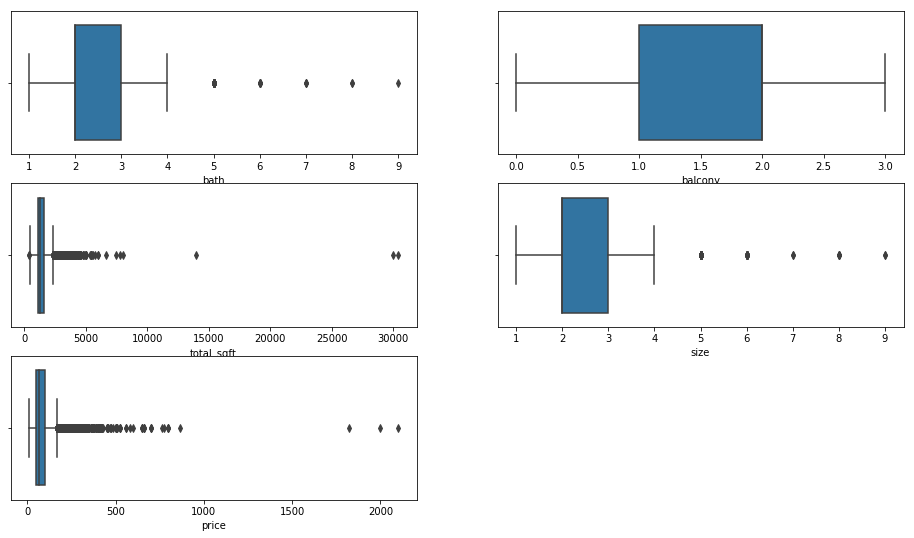

In [177]:
plt.figure(figsize=(16,9))
for i,var in enumerate(plot):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[var])

In [178]:
df.head()

,area_type,availability,location,bath,balcony,price,total_sqft,size,prft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,2.0,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3.0,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3.0,8571.428571
3,Super built-up Area,18-May,Devarachikkanahalli,2.0,3.0,44.0,1250.0,3.0,3520.000000
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2.0,3200.000000


# Working with the availability of the house

In [179]:
df["availability"].value_counts().head()

Ready To Move    5423
18-Dec            171
18-May            161
18-Apr            139
18-Aug            130
Name: availability, dtype: int64

In [180]:
#Converting dates to months
avail=[]
for i in df["availability"]:
    if i=="Ready To Move":
        avail.append("Ready To Move")
    else:
        avail.append(i.split("-")[1])

avail_set=set(avail)
print(len(avail_set))        

13


In [181]:
df["availability"].head()

0    Ready To Move
1    Ready To Move
2    Ready To Move
3           18-May
4    Ready To Move
Name: availability, dtype: object

In [182]:
df=df.drop(["availability"],axis=1,errors="ignore")
#removing the old size
df=df.join(pd.DataFrame({"availability":avail}))
#appending the new size 

In [183]:
df["availability"].head()

0    Ready To Move
1    Ready To Move
2    Ready To Move
3              May
4    Ready To Move
Name: availability, dtype: object

In [184]:
df.dropna()
df["availability"].value_counts()


Ready To Move    4884
Dec               336
May               158
Apr               141
Aug               133
Mar               129
Jul               108
Jun                94
Jan                59
Oct                55
Sep                47
Nov                41
Feb                34
Name: availability, dtype: int64

In [185]:
for i in df.columns:
    print(i)
    print(len(df[i].value_counts()))
    print("--------------------------")

area_type
4
--------------------------
location
578
--------------------------
bath
9
--------------------------
balcony
5
--------------------------
price
1295
--------------------------
total_sqft
1323
--------------------------
size
9
--------------------------
prft
4582
--------------------------
availability
13
--------------------------


# Label Encoding Data

In [186]:
df.to_csv("label.csv",index=False)
from sklearn import preprocessing
import pickle

In [187]:
lb=preprocessing.LabelEncoder()

In [188]:
df["availability"]=lb.fit_transform(df["availability"])
lb.classes_

array([nan, 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Ready To Move', 'Sep'], dtype=object)

In [189]:
lb.classes_
pickle.dump(lb,open("avail.pkl","wb"))

In [190]:
df["area_type"]=lb.fit_transform(df["area_type"])
lb.classes_

array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object)

In [191]:
lb.classes_
pickle.dump(lb,open("area_type.pkl","wb"))

# Working on the location

In [192]:
locval=df["location"].value_counts()
locval

Whitefield                  371
Sarjapur  Road              216
Electronic City             203
Kanakpura Road              144
Uttarahalli                 139
Yelahanka                   134
Raja Rajeshwari Nagar       128
Bannerghatta Road           116
Thanisandra                 111
Marathahalli                110
Hennur Road                 108
Haralur Road                101
7th Phase JP Nagar           99
Hebbal                       94
Electronic City Phase II     90
Begur Road                   64
Hoodi                        61
Kasavanhalli                 60
Bellandur                    59
KR Puram                     58
Rajaji Nagar                 54
Harlur                       54
Banashankari                 50
Kothanur                     48
Sarjapur                     48
Hormavu                      46
Chandapura                   46
Yeshwanthpur                 46
Koramangala                  43
Jakkur                       43
                           ... 
NS Palya

In [193]:
locval_index=locval[locval>=20].index
locval_index

Index([u'Whitefield', u'Sarjapur  Road', u'Electronic City', u'Kanakpura Road',
       u'Uttarahalli', u'Yelahanka', u'Raja Rajeshwari Nagar',
       u'Bannerghatta Road', u'Thanisandra', u'Marathahalli', u'Hennur Road',
       u'Haralur Road', u'7th Phase JP Nagar', u'Hebbal',
       u'Electronic City Phase II', u'Begur Road', u'Hoodi', u'Kasavanhalli',
       u'Bellandur', u'KR Puram', u'Rajaji Nagar', u'Harlur', u'Banashankari',
       u'Kothanur', u'Sarjapur', u'Hormavu', u'Chandapura', u'Yeshwanthpur',
       u'Koramangala', u'Jakkur', u'Electronics City Phase 1',
       u'Ramagondanahalli', u'JP Nagar', u'Kaggadasapura', u'Akshaya Nagar',
       u'Hennur', u'Budigere', u'TC Palaya', u'CV Raman Nagar',
       u'Ramamurthy Nagar', u'Hulimavu', u'Nagarbhavi', u'Kengeri',
       u'Hosa Road', u'Vittasandra', u'8th Phase JP Nagar', u'HSR Layout',
       u'Mysore Road', u'Varthur', u'Rachenahalli', u'Bisuvanahalli',
       u'Indira Nagar', u'Gottigere', u'Brookefield', u'Kundalahalli',

In [194]:
for cat_var in locval_index:
    df['location_'+cat_var]=np.where(df['location']==cat_var,1,0)

#creating a new column for every major location

In [195]:
df.shape

(6926, 95)

In [196]:
df.drop("location",axis="columns",inplace=True) #removing since we dont need it now

In [197]:
df.to_csv("CleanedData.csv",index=False)
#saving the cleaned data
df.shape

(6926, 94)